In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
nba_data=pd.read_csv('shot_logs.csv')
cols = ['FINAL_MARGIN','SHOT_NUMBER','PERIOD','DRIBBLES','TOUCH_TIME','SHOT_DIST','PTS_TYPE','PTS','SHOT_RESULT']
nba_data=nba_data[cols]
a=nba_data.iloc[:,:7].values
b=nba_data.iloc[:,7:8].values
X_train,X_test,Y_train,Y_test=train_test_split(a,b,test_size=0.4,random_state=20)
print(X_train)
print (X_test)
print(Y_train)
print (Y_test)
tree=DecisionTreeClassifier(max_depth=3,random_state=10)
tree.fit(X_train,Y_train)
print("Accuracy train %.3f" %tree.score(X_train,Y_train))
print("Accuracy test %.3f"  %tree.score(X_test,Y_test))


[[  3.    6.    2.  ...,   1.1  38.8   3. ]
 [-12.    1.    1.  ...,   3.4   1.6   2. ]
 [-13.    5.    4.  ...,   1.6   5.6   2. ]
 ..., 
 [  8.    7.    4.  ...,   7.4  24.1   3. ]
 [ -9.    5.    1.  ...,   4.2  24.2   3. ]
 [  7.    8.    3.  ...,   1.9  43.3   3. ]]
[[-17.    9.    4.  ...,   1.1  25.2   3. ]
 [ 15.   16.    4.  ...,   4.6  16.    2. ]
 [  2.   14.    4.  ...,   5.8  18.2   2. ]
 ..., 
 [ -3.   15.    4.  ...,   1.   22.8   3. ]
 [-22.    9.    4.  ...,   3.1   4.5   2. ]
 [ -7.    5.    2.  ...,   0.9  25.7   3. ]]
[[0]
 [2]
 [2]
 ..., 
 [0]
 [0]
 [0]]
[[0]
 [2]
 [0]
 ..., 
 [0]
 [0]
 [0]]
Accuracy train 0.611
Accuracy test 0.608


In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="mytree.dot", class_names=["made", "missed"],
                feature_names=nba_data.columns, impurity=False, filled=True)

In [16]:
from graphviz import Graph
g=Graph(format='png')
tree.format='png'
tree.render()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'render'

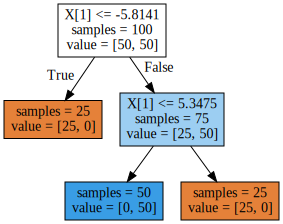

In [6]:
import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
tree.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.01174164,  0.00238924,
        0.98586911])

In [4]:
import matplotlib.pyplot as plt


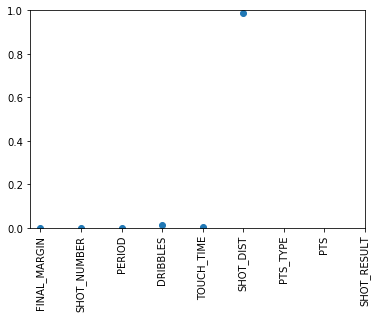

In [5]:
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(nba_data.shape[1]), nba_data.columns, rotation=90)
plt.ylim(0, 1)
plt.show()

Feature importances: [ 0.  1.]


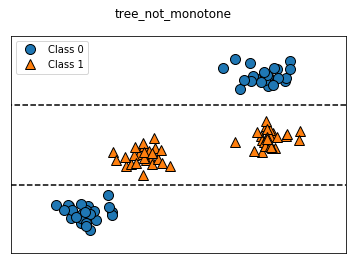

In [6]:
import mglearn
tree = mglearn.plots.plot_tree_not_monotone()
plt.suptitle("tree_not_monotone")
plt.show()

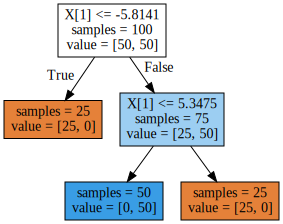

In [7]:
%matplotlib inline
tree